### colab setup

<a href="https://colab.research.google.com/github/e-cremente/physioex/blob/main/examples/freq_bands_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# colab setup
from google.colab import drive
drive.mount("/content/drive")

import os
working_dir = "/content/drive/MyDrive/Thesis"
os.chdir( working_dir )

!git clone https://github.com/e-cremente/physioex.git
%cd physioex

!git pull origin main
!pip install -e .

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from physioex.explain.freq_bands_explainer import FreqBandsExplainer
from loguru import logger

ckp_path = "models/cel/chambon2018/seqlen=3/dreem/dodh/"

expl = FreqBandsExplainer(
            model_name = "chambon2018",
            dataset_name  = "dreem",
            version = "dodh",
            use_cache = True,
            sequence_lenght  = 3,
            ckp_path = ckp_path,
            batch_size  = 32,
            #questo parametro da un errore. Non e' previsto dal costruttore della classe FreqBandsExplainer (e.c.)
            #n_jobs = 1
            )

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/usr/local/lib/python3.10/dist-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(
/usr/local/lib/python3.10/dist-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions 

In [ ]:
#cambiato Gamma da [30, 50] a [30, 49.5] perche' con un sampling rate di 100hz, il filtro che tagliasse fuori frequenze di 50hz non era applicabile (e.c.)
sleep_bands = { 'Alpha' : [8, 12], 'Beta' : [12, 30], 'Delta' : [0.5, 4], 'Theta' : [4, 8], 'Gamma' : [30, 49.5] }

for band in sleep_bands:
    logger.info("Explaining band: {}".format(band))

    #il numero di jobs viene invece specificato qui, come ultimo parametro della chiamata del metodo (e.c.)
    expl.explain(sleep_bands[band], band_name = format(band), save_csv= True,  plot_pred = True, plot_true = True, n_jobs = 1)

    # plot the results of the 0 fold
    img = mpimg.imread( ckp_path + 'fold=0_true_band=' + str(band) + '_importance.png')
    imgplot = plt.imshow(img)
    plt.show()

    img = mpimg.imread( ckp_path + 'fold=0_pred_band=' + str(band) + '_importance.png')
    imgplot = plt.imshow(img)
    plt.show()


2024-01-20 20:48:44.723 | INFO     | __main__:<cell line: 4>:5 - Explaining band: Alpha


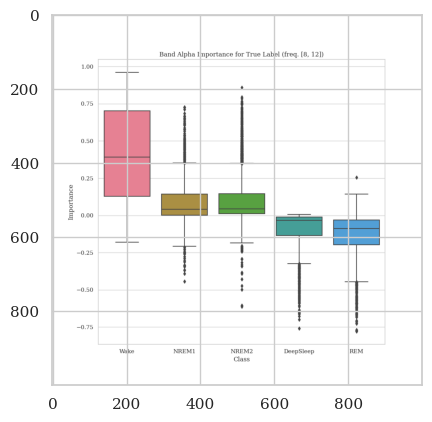

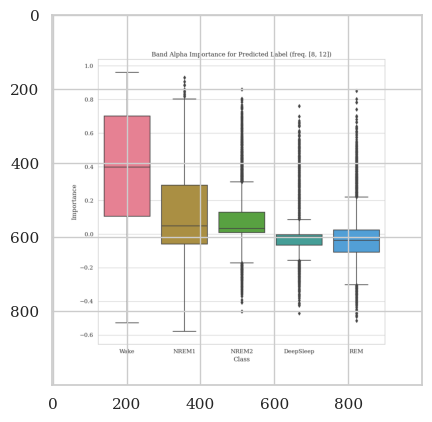

2024-01-20 20:48:46.478 | INFO     | __main__:<cell line: 4>:5 - Explaining band: Beta


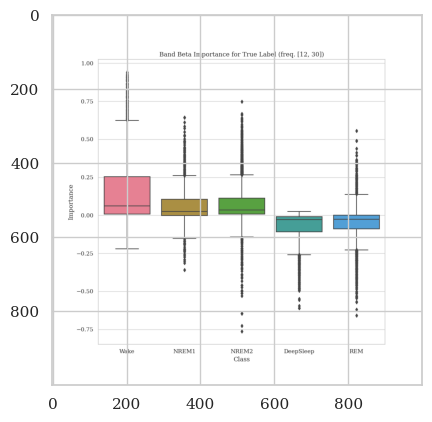

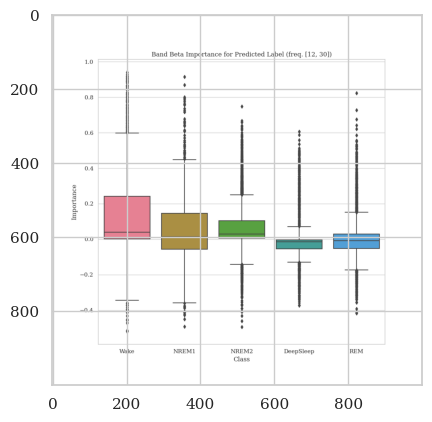

2024-01-20 20:48:47.302 | INFO     | __main__:<cell line: 4>:5 - Explaining band: Delta


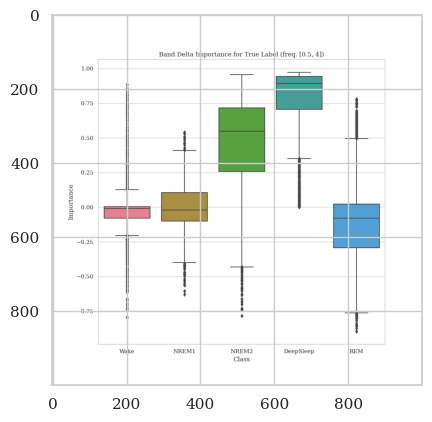

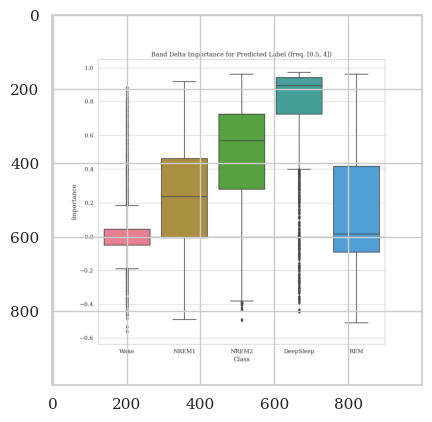

2024-01-20 20:48:48.008 | INFO     | __main__:<cell line: 4>:5 - Explaining band: Theta


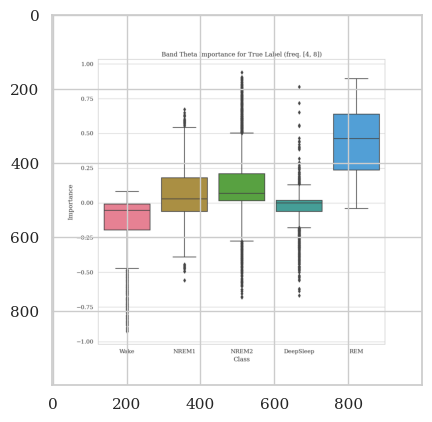

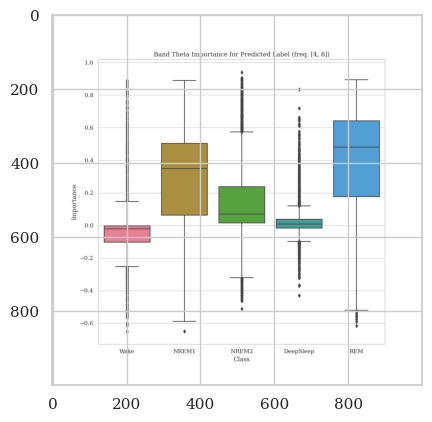

2024-01-20 20:48:48.693 | INFO     | __main__:<cell line: 4>:5 - Explaining band: Gamma


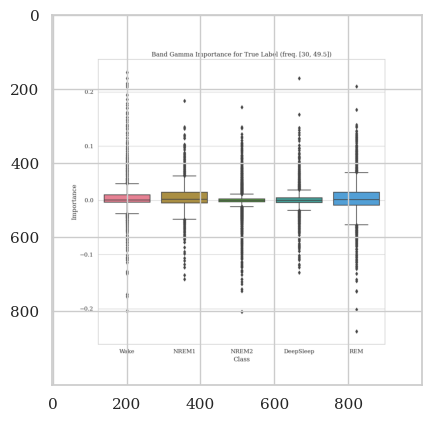

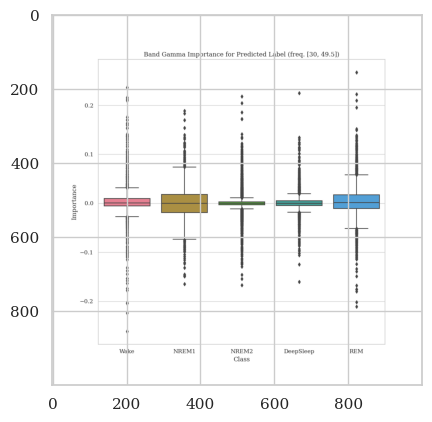

In [4]:
#cambiato Gamma da [30, 50] a [30, 49.5] perche' con un sampling rate di 100hz, il filtro che tagliasse fuori frequenze di 50hz non era applicabile (e.c.)
sleep_bands = { 'Alpha' : [8, 12], 'Beta' : [12, 30], 'Delta' : [0.5, 4], 'Theta' : [4, 8], 'Gamma' : [30, 49.5] }

for band in sleep_bands:
    logger.info("Explaining band: {}".format(band))

    # plot the results of the 0 fold
    img = mpimg.imread( ckp_path + 'fold=0_true_band=' + str(band) + '_importance.png')
    imgplot = plt.imshow(img)
    plt.show()

    img = mpimg.imread( ckp_path + 'fold=0_pred_band=' + str(band) + '_importance.png')
    imgplot = plt.imshow(img)
    plt.show()

## Experiments results

### Alpha band

Relevant importance for Wake class. Median around 0,40 while the other classes remain close to 0.

### Beta band

Seems like Beta band importance for every class has median close to 0, but its influence is more noticeable on Wake class.

### Delta band

Importance of Delta band is predominant for NREM2 and DeepSleep classes. While the first is close to 0,50, the second one is close to 1.

### Theta band

With an importance of 0,50, the REM class is the one affected by this band's frequencies. It's probably significative to notice that this band is the only one, at this stage of the experiment, to influence the NREM1 class. Even if the median is close to 0, the interquartile range arrives close to 0,25. A similar consideration can be done for the NREM2 class.

### Gamma band

All the classes look unaffected by the Gamma band, with a median very close to 0 in all of the 5 cases.